In [6]:
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import job_monitor

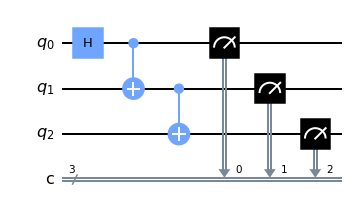

In [7]:
circuit = QuantumCircuit(3,3)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2],[0,1,2])
circuit.draw('mpl')

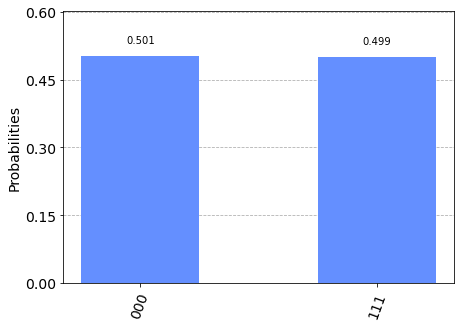

In [8]:
simulator = Aer.get_backend('qasm_simulator')
simulation_result = execute(circuit, backend=simulator, shots=1024).result()
plot_histogram(simulation_result.get_counts())

In [9]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmq_manila')

ibmqfactory.load_account:WARNING:2022-07-23 00:36:23,970: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [11]:
job = execute(circuit, backend=device, shots=1024)
print(job.job_id())
job_monitor(job)

62db266f0add6e8dc067dd48
Job Status: job has successfully run


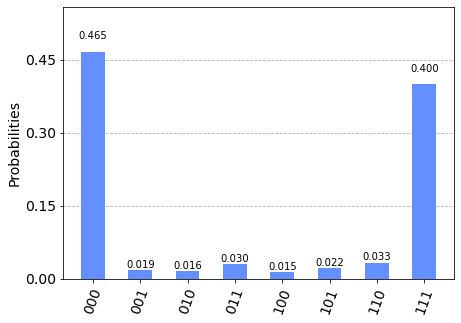

In [12]:
device_result = job.result()
plot_histogram(device_result.get_counts())

In [15]:
from qiskit.utils.mitigation import complete_meas_cal, CompleteMeasFitter
cal_circuits, state_labels = complete_meas_cal(qr= circuit.qregs[0], circlabel='measerrormitigationcal')

In [19]:
print(cal_circuits)

[<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fddf0a3fa00>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fddf0a3f550>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fddf0a3f820>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fddf0a3f5e0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fddf0a3f310>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fddf0a3fcd0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fddf0a3feb0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fde00d2c5b0>]


In [23]:
len(cal_circuits)

8

In [24]:
cal_job = execute(cal_circuits, backend=device, shots=1024, optimization_level=0)
print(cal_job.job_id())
job_monitor(cal_job)

62db28fa9d218fde76b97887
Job Status: job has successfully run


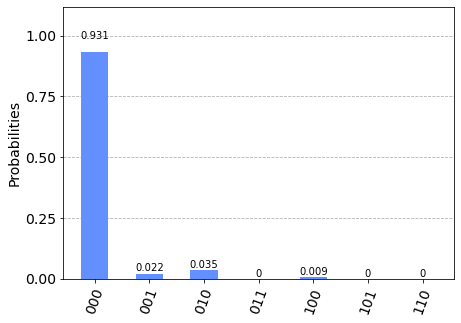

In [31]:
cal_circuits_result = cal_job.result()
plot_histogram(cal_circuits_result.get_counts(cal_circuits[0]))

In [35]:
meas_fitter = CompleteMeasFitter(cal_circuits_result, state_labels)
meas_filter = meas_fitter.filter
mitigated_result = meas_filter.apply(device_result)

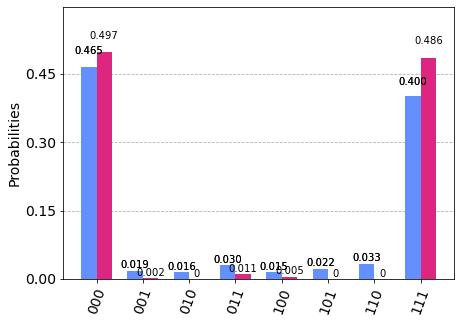

In [37]:
plot_histogram([device_result.get_counts(), mitigated_result.get_counts()])

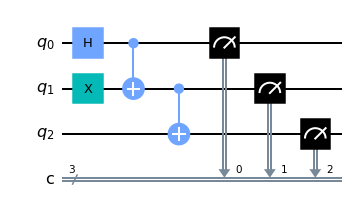

In [38]:
circuit2 = QuantumCircuit(3,3)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(1,2)
circuit2.measure([0,1,2], [0,1,2])
circuit2.draw('mpl')

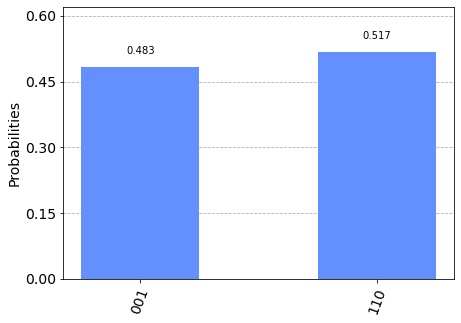

In [39]:
plot_histogram(execute(circuit2, backend=simulator, shots=1024).result().get_counts())

In [40]:
job2 = execute(circuit2, backend=device, shots=1024)
print(job2.job_id())
job_monitor(job2)

62db2c1df1f1b50241a900d7
Job Status: job has successfully run


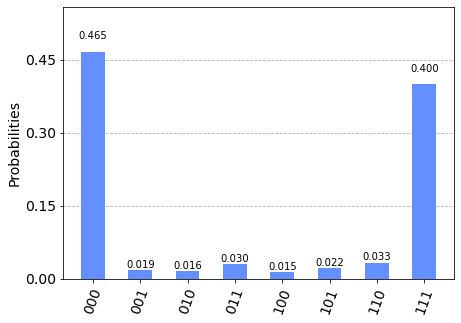

In [41]:
device_result2 = job.result()
plot_histogram(device_result2.get_counts())

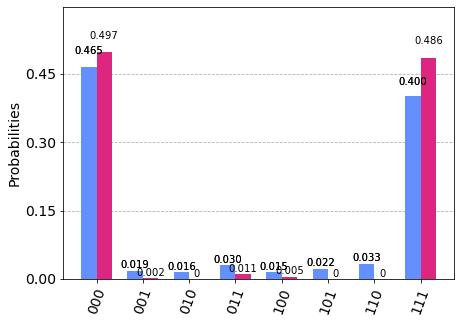

In [43]:
mitigated_result2 = meas_filter.apply(device_result2)
plot_histogram([device_result2.get_counts(), mitigated_result2.get_counts()])